In [1]:
import pandas as pd
import numpy as np

from urllib.error import HTTPError

In [2]:
import synth

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 9)})

In [4]:
url = lambda year: f"https://www.electoralcalculus.co.uk/electdata_{year}.txt"

In [5]:
def read_data(year):
    df = pd.read_csv(url(year), sep=";", encoding="ISO-8859-1")
    county_row = df[["Name", "CON"]].groupby("Name").mean().T
    county_row.index = [year]
    
    return county_row

In [6]:
def historical_data():
    df = pd.DataFrame()
    
    for year in range(1955, 2020):
        print(f"Reading data for {year}", end="\r")
        try:
            row = read_data(year)
            df = df.append(row)
            
        except HTTPError:
            continue
            
    return df.sort_index()

In [7]:
df = historical_data()

In [52]:
df_interp = df[df.columns[~df.isnull().iloc[-1]]].interpolate().dropna(axis = 1)

In [88]:
df_norm = (df_interp / df_interp.iloc[0]).dropna(axis = 1)

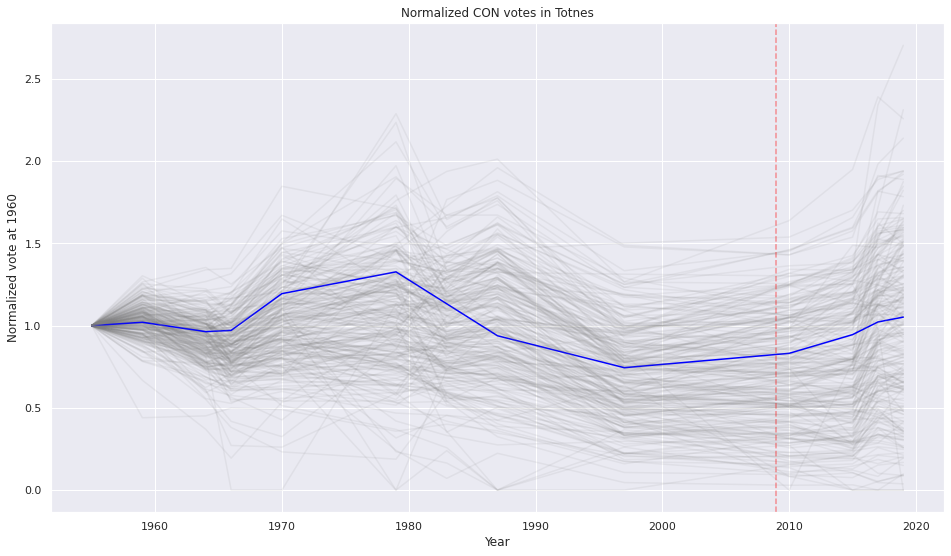

In [119]:
fig, ax = plt.subplots()

ax.set_title("Normalized CON votes in Totnes")
ax.set_xlabel("Year")
ax.set_ylabel("Normalized vote at 1960")

for col in df_norm.columns:
    if col == "Totnes":
        df_norm[col].plot(ax = ax, c="blue")
    else:
        df_norm[col].plot(ax = ax, c="gray", alpha=0.1)
        
ax.axvline(2009, linestyle="--", c="red", alpha=0.4)

fig.show()